AMES IOWA HOSING Project Analysis

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
import zipfile
pd.set_option('display.max_columns', None)

<h4>Loading the Data</h4>

In [108]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/ames-housing-dataset.zip'
response = requests.get(url)
print(response.status_code)
if(response.status_code == 200):
    print("Data Fetched successfully")
else:
    print("Failed to fetch Data " + response.status_code)

response.raise_for_status

200
Data Fetched successfully


<bound method Response.raise_for_status of <Response [200]>>

In [208]:
# Fetching the data from the Response
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    csv_name = [name for name in z.namelist() if name.endswith(".csv")][0]
    print(csv_name)

    with z.open(csv_name) as csv:
        df = pd.read_csv(csv,engine="pyarrow", dtype_backend="pyarrow")
        print(df.head())

AmesHousing.csv
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL           141     31770   Pave   
1      2  526350040           20        RH            80     11622   Pave   
2      3  526351010           20        RL            81     14267   Pave   
3      4  526353030           20        RL            93     11160   Pave   
4      5  527105010           60        RL            74     13830   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  <NA>       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
1  <NA>       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
2  <NA>       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
3  <NA>       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
4  <NA>       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   

  Condition 1 Condition 2 Bldg Type House Styl

In [110]:
import sys
print(sys.executable)

/opt/homebrew/Caskroom/miniconda/base/envs/myenv/bin/python


In [111]:
from IPython.display import display, HTML

css = """
<style>
.output_text, .output_stdout {
    white-space: pre; /* Preserve whitespace */
    overflow-x: auto; /* Enable horizontal scrolling */
    display: block; /* Ensure block display */
    max-width: 100%; /* Limit width to container */
}
</style>
"""
display(HTML(css))

In [112]:
print(df.shape)
print(df.describe())

(2930, 82)
           Order               PID  MS SubClass  Lot Frontage      Lot Area  \
count     2930.0            2930.0       2930.0        2440.0        2930.0   
mean      1465.5  714464496.988737    57.387372      69.22459  10147.921843   
std    845.96247   188730844.64939    42.638025     23.365335   7880.017759   
min          1.0       526301100.0         20.0          21.0        1300.0   
25%       733.25       528477022.5         20.0          58.0       7440.25   
50%       1465.5       535453620.0         50.0          68.0        9436.5   
75%      2197.75       907181097.5         70.0          80.0      11555.25   
max       2930.0      1007100110.0        190.0         313.0      215245.0   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count        2930.0        2930.0       2930.0          2930.0        2907.0   
mean       6.094881       5.56314  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    

In [113]:
print(df.dtypes)

Order              int64[pyarrow]
PID                int64[pyarrow]
MS SubClass        int64[pyarrow]
MS Zoning         string[pyarrow]
Lot Frontage       int64[pyarrow]
                       ...       
Mo Sold            int64[pyarrow]
Yr Sold            int64[pyarrow]
Sale Type         string[pyarrow]
Sale Condition    string[pyarrow]
SalePrice          int64[pyarrow]
Length: 82, dtype: object


In [114]:
print(df.select_dtypes('string'))

     MS Zoning Street Alley Lot Shape Land Contour Utilities Lot Config  \
0           RL   Pave  <NA>       IR1          Lvl    AllPub     Corner   
1           RH   Pave  <NA>       Reg          Lvl    AllPub     Inside   
2           RL   Pave  <NA>       IR1          Lvl    AllPub     Corner   
3           RL   Pave  <NA>       Reg          Lvl    AllPub     Corner   
4           RL   Pave  <NA>       IR1          Lvl    AllPub     Inside   
...        ...    ...   ...       ...          ...       ...        ...   
2925        RL   Pave  <NA>       IR1          Lvl    AllPub    CulDSac   
2926        RL   Pave  <NA>       IR1          Low    AllPub     Inside   
2927        RL   Pave  <NA>       Reg          Lvl    AllPub     Inside   
2928        RL   Pave  <NA>       Reg          Lvl    AllPub     Inside   
2929        RL   Pave  <NA>       Reg          Lvl    AllPub     Inside   

     Land Slope Neighborhood Condition 1 Condition 2 Bldg Type House Style  \
0           Gtl      

In [115]:
print(pd.get_option('display.max_columns'))

None


In [116]:
df.select_dtypes('string').describe().T

,count,unique,top,freq
MS Zoning,2930,7,RL,2273
Street,2930,2,Pave,2918
Alley,198,2,Grvl,120
Lot Shape,2930,4,Reg,1859
Land Contour,2930,4,Lvl,2633
Utilities,2930,3,AllPub,2927
Lot Config,2930,5,Inside,2140
Land Slope,2930,3,Gtl,2789
Neighborhood,2930,28,NAmes,443
Condition 1,2930,9,Norm,2522


In [117]:
#prints the number of bytes the String uses before converting into astype - category
print(df.select_dtypes('string')
      .memory_usage(deep=True)
      .sum())

929599


In [118]:
# prints the number of Kb bytes the indiviudal column of String uses
print(df.select_dtypes('string')
        .astype('category')
        .memory_usage(deep=True))

Index              132
MS Zoning         3288
Street            3055
Alley             3055
Lot Shape         3131
Land Contour      3131
Utilities         3069
Lot Config        3148
Land Slope        3060
Neighborhood      4304
Condition 1       3307
Condition 2       3298
Bldg Type         3150
House Style       3309
Roof Style        3157
Roof Matl         3314
Exterior 1st      3660
Exterior 2nd      3670
Mas Vnr Type      3143
Exter Qual        3127
Exter Cond        3133
Foundation        3157
Bsmt Qual         3133
Bsmt Cond         3133
Bsmt Exposure     3127
BsmtFin Type 1    3145
BsmtFin Type 2    3145
Heating           3152
Heating QC        3133
Central Air       3049
Electrical        3146
Kitchen Qual      3133
Functional        3291
Fireplace Qu      3133
Garage Type       3166
Garage Finish     3060
Garage Qual       3133
Garage Cond       3133
Paved Drive       3054
Pool QC           3127
Fence             3137
Misc Feature      3143
Sale Type         3308
Sale Condit

In [119]:
#prints the number of bytes the String uses before after into astype - category
print(df.select_dtypes('string')
      .astype('category')
      .memory_usage(deep=True)
      .sum())

137945


In [120]:
929599/137945 # This shows converting to category, the low cardinality String Columns has better memory usage
# also using category shows it's 6 times more than the regular String datatype column

6.738910435318424

In [121]:
print(df
      .isna()
      .mean()
      .mul(100)
      .pipe(lambda seri : seri[seri > 0]))

Lot Frontage      16.723549
Alley             93.242321
Mas Vnr Type      60.580205
Mas Vnr Area       0.784983
Bsmt Qual          2.730375
Bsmt Cond          2.730375
Bsmt Exposure      2.832765
BsmtFin Type 1     2.730375
BsmtFin SF 1       0.034130
BsmtFin Type 2     2.764505
BsmtFin SF 2       0.034130
Bsmt Unf SF        0.034130
Total Bsmt SF      0.034130
Electrical         0.034130
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
Fireplace Qu      48.532423
Garage Type        5.358362
Garage Yr Blt      5.426621
Garage Finish      5.426621
Garage Cars        0.034130
Garage Area        0.034130
Garage Qual        5.426621
Garage Cond        5.426621
Pool QC           99.556314
Fence             80.477816
Misc Feature      96.382253
dtype: float64


Cleaning and Converting String Datatypes as Categories

In [122]:
# Missing string values
(df
 .select_dtypes('string')
 .eq('')
 .mean() 
 .mul(100)
 .pipe(lambda ser: ser[ser > 0])
)

Series([], dtype: double[pyarrow])

In [123]:
(df
 .select_dtypes('string')
 .eq('')
 .any(axis='columns')
)

0       False
1       False
2       False
3       False
4       False
        ...  
2925    False
2926    False
2927    False
2928    False
2929    False
Length: 2930, dtype: bool[pyarrow]

In [124]:
# Looks like many values are NA
# Missing string values (Encoded as NA)
(df
 .select_dtypes('string')
 .eq('NA')
 .mean() 
 .mul(100)
 .pipe(lambda ser: ser[ser > 0])
)

Series([], dtype: double[pyarrow])

In [125]:
# deleting
# Notice Alley is NA!
#Gives Rows that are missing values
(df
 [~df.select_dtypes('string').eq('').any(axis='columns')]
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141,31770,Pave,<NA>,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112,TA,TA,CBlock,TA,Gd,Gd,BLQ,639,Unf,0,441,1080,GasA,Fa,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960,Fin,2,528,TA,TA,P,210,62,0,0,0,0,<NA>,<NA>,<NA>,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80,11622,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,<NA>,0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,<NA>,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,<NA>,MnPrv,<NA>,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81,14267,Pave,<NA>,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,<NA>,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,<NA>,<NA>,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93,11160,Pave,<NA>,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,<NA>,0,Gd,TA,CBlock,TA,TA,No,ALQ,1065,Unf,0,1045,2110,GasA,Ex,Y,SBrkr,2110,0,0,2110,1,0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968,Fin,2,522,TA,TA,Y,0,0,0,0,0,0,<NA>,<NA>,<NA>,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74,13830,Pave,<NA>,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,<NA>,0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,<NA>,MnPrv,<NA>,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37,7937,Pave,<NA>,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,<NA>,0,TA,TA,CBlock,TA,TA,Av,GLQ,819,Unf,0,184,1003,GasA,TA,Y,SBrkr,1003,0,0,1003,1,0,1,0,3,1,TA,6,Typ,0,<NA>,Detchd,1984,Unf,2,588,TA,TA,Y,120,0,0,0,0,0,<NA>,GdPrv,<NA>,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,<NA>,8885,Pave,<NA>,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,<NA>,0,TA,TA,CBlock,Gd,TA,Av,BLQ,301,ALQ,324,239,864,GasA,TA,Y,SBrkr,902,0,0,902,1,0,1,0,2,1,TA,5,Typ,0,<NA>,Attchd,1983,Unf,2,484,TA,TA,Y,164,0,0,0,0,0,<NA>,MnPrv,<NA>,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62,10441,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,<NA>,0,TA,TA,PConc,Gd,TA,Av,GLQ,337,Unf,0,575,912,GasA,TA,Y,SBrkr,970,0,0,970,0,1,1,0,3,1,TA,6,Typ,0,<NA>,<NA>,<NA>,<NA>,0,0,<NA>,<NA>,Y,80,32,0,0,0,0,<NA>,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77

In [126]:
(df
 .query('`Pool QC`.isna()')
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141,31770,Pave,<NA>,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112,TA,TA,CBlock,TA,Gd,Gd,BLQ,639,Unf,0,441,1080,GasA,Fa,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960,Fin,2,528,TA,TA,P,210,62,0,0,0,0,<NA>,<NA>,<NA>,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80,11622,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,<NA>,0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,<NA>,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,<NA>,MnPrv,<NA>,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81,14267,Pave,<NA>,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,<NA>,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,<NA>,<NA>,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93,11160,Pave,<NA>,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,<NA>,0,Gd,TA,CBlock,TA,TA,No,ALQ,1065,Unf,0,1045,2110,GasA,Ex,Y,SBrkr,2110,0,0,2110,1,0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968,Fin,2,522,TA,TA,Y,0,0,0,0,0,0,<NA>,<NA>,<NA>,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74,13830,Pave,<NA>,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,<NA>,0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,<NA>,MnPrv,<NA>,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37,7937,Pave,<NA>,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,<NA>,0,TA,TA,CBlock,TA,TA,Av,GLQ,819,Unf,0,184,1003,GasA,TA,Y,SBrkr,1003,0,0,1003,1,0,1,0,3,1,TA,6,Typ,0,<NA>,Detchd,1984,Unf,2,588,TA,TA,Y,120,0,0,0,0,0,<NA>,GdPrv,<NA>,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,<NA>,8885,Pave,<NA>,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,<NA>,0,TA,TA,CBlock,Gd,TA,Av,BLQ,301,ALQ,324,239,864,GasA,TA,Y,SBrkr,902,0,0,902,1,0,1,0,2,1,TA,5,Typ,0,<NA>,Attchd,1983,Unf,2,484,TA,TA,Y,164,0,0,0,0,0,<NA>,MnPrv,<NA>,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62,10441,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,<NA>,0,TA,TA,PConc,Gd,TA,Av,GLQ,337,Unf,0,575,912,GasA,TA,Y,SBrkr,970,0,0,970,0,1,1,0,3,1,TA,6,Typ,0,<NA>,<NA>,<NA>,<NA>,0,0,<NA>,<NA>,Y,80,32,0,0,0,0,<NA>,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77

In [127]:
(df
 .query('`Pool QC` == "NA"')
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [128]:
#Assign generally takes a parameter, para1=column_name, para2=generate_value Result =new column + generated_value. 
# But if we pass ** + dataframe, it takes the df and updates the value accordingly
# tells Pandas to replace the True values with the string 'Not Applicable'
print(df
      .assign(** df.select_dtypes('string').isna().replace(to_replace=True,value='Not Applicable')))

      Order        PID  MS SubClass  MS Zoning  Lot Frontage  Lot Area  \
0         1  526301100           20      False           141     31770   
1         2  526350040           20      False            80     11622   
2         3  526351010           20      False            81     14267   
3         4  526353030           20      False            93     11160   
4         5  527105010           60      False            74     13830   
...     ...        ...          ...        ...           ...       ...   
2925   2926  923275080           80      False            37      7937   
2926   2927  923276100           20      False          <NA>      8885   
2927   2928  923400125           85      False            62     10441   
2928   2929  924100070           20      False            77     10010   
2929   2930  924151050           60      False            74      9627   

      Street           Alley  Lot Shape  Land Contour  Utilities  Lot Config  \
0      False  Not Applicable   

In [129]:
# Even if you're only checking for a single value, .isin() expects a collection as its argument. , To findall list, we pass list[]
string_cols = df.select_dtypes(include='object').columns #Use object for recent pandas versions.
print(df
      [df[string_cols]
       .isin(['Not Applicable']).any(axis='columns')]
      )

Empty DataFrame
Columns: [Order, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val

In [130]:
print(df
      .assign(** df.select_dtypes('string').replace('','Not Applicable')))

      Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL           141     31770   Pave   
1         2  526350040           20        RH            80     11622   Pave   
2         3  526351010           20        RL            81     14267   Pave   
3         4  526353030           20        RL            93     11160   Pave   
4         5  527105010           60        RL            74     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL            37      7937   Pave   
2926   2927  923276100           20        RL          <NA>      8885   Pave   
2927   2928  923400125           85        RL            62     10441   Pave   
2928   2929  924100070           20        RL            77     10010   Pave   
2929   2930  924151050           60        RL            74      9627   Pave   

     Alley Lot Shape Land Contour Utili

In [131]:
df['Electrical'].value_counts(dropna=False)

Electrical
SBrkr    2682
FuseA     188
FuseF      50
FuseP       8
<NA>        1
Mix         1
Name: count, dtype: int64[pyarrow]

In [132]:
(df
    .query('Electrical.isna()'))

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,1578,916386080,80,RL,73,9735,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,<NA>,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,<NA>,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,<NA>,BuiltIn,2007,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,<NA>,<NA>,<NA>,0,5,2008,WD,Normal,167500


In [133]:
#pandas value_counts() function by default, excludes NaN values. dropna=False ensures that NaN values are included in the count
(df['Fireplace Qu']
 .value_counts(dropna=False))

Fireplace Qu
<NA>    1422
Gd       744
TA       600
Fa        75
Po        46
Ex        43
Name: count, dtype: int64[pyarrow]

In [134]:
(df['Bsmt Cond']
    .value_counts(dropna=False))

Bsmt Cond
TA      2616
Gd       122
Fa       104
<NA>      80
Po         5
Ex         3
Name: count, dtype: int64[pyarrow]

In [135]:
# memory usage before converting the String to categories
(df.assign(
  **  df.select_dtypes('string')
 .isna()
 .replace(to_replace=True,value='Not Applicable')
)
.memory_usage(deep=True)
.sum()
 )

np.int64(3091928)

In [136]:
# memory usage after converting the String to categories

(df
 .assign(
    ** df.select_dtypes('string')
    .isna()
    .replace(to_replace=True, value='Not Applicable')
    .astype('category')
)
.memory_usage(deep=True)
.sum()
)

np.int64(1049818)

In [137]:
# memory usage before converting the String to categories
(df.assign(
  **  df.select_dtypes('string')
 .replace('','Not Applicable')
)
.memory_usage(deep=True)
.sum()
 )

np.int64(1847796)

In [138]:
# memory usage before converting the String to categories
(df.assign(
  **  df.select_dtypes('string')
 .replace('','Not Applicable')
 .astype('category')
)
.memory_usage(deep=True)
.sum()
 )

np.int64(1056142)

In [139]:
(df.dtypes)

Order              int64[pyarrow]
PID                int64[pyarrow]
MS SubClass        int64[pyarrow]
MS Zoning         string[pyarrow]
Lot Frontage       int64[pyarrow]
                       ...       
Mo Sold            int64[pyarrow]
Yr Sold            int64[pyarrow]
Sale Type         string[pyarrow]
Sale Condition    string[pyarrow]
SalePrice          int64[pyarrow]
Length: 82, dtype: object

In [140]:
for col in df.select_dtypes('string').columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in MS Zoning: <ArrowExtensionArray>
['RL', 'RH', 'FV', 'RM', 'C (all)', 'I (all)', 'A (agr)']
Length: 7, dtype: string[pyarrow]
Unique values in Street: <ArrowExtensionArray>
['Pave', 'Grvl']
Length: 2, dtype: string[pyarrow]
Unique values in Alley: <ArrowExtensionArray>
[<NA>, 'Pave', 'Grvl']
Length: 3, dtype: string[pyarrow]
Unique values in Lot Shape: <ArrowExtensionArray>
['IR1', 'Reg', 'IR2', 'IR3']
Length: 4, dtype: string[pyarrow]
Unique values in Land Contour: <ArrowExtensionArray>
['Lvl', 'HLS', 'Bnk', 'Low']
Length: 4, dtype: string[pyarrow]
Unique values in Utilities: <ArrowExtensionArray>
['AllPub', 'NoSewr', 'NoSeWa']
Length: 3, dtype: string[pyarrow]
Unique values in Lot Config: <ArrowExtensionArray>
['Corner', 'Inside', 'CulDSac', 'FR2', 'FR3']
Length: 5, dtype: string[pyarrow]
Unique values in Land Slope: <ArrowExtensionArray>
['Gtl', 'Mod', 'Sev']
Length: 3, dtype: string[pyarrow]
Unique values in Neighborhood: <ArrowExtensionArray>
[  'NAmes', 'Gilbert',

In [141]:
print(df
      .isna()
      .sum()
      .pipe(lambda ser: ser[ser > 0]))

Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


In [142]:
print(df.select_dtypes('string')
      .isna()
      .sum()
      .pipe(lambda ser: ser[ser > 0]))

Alley             2732
Mas Vnr Type      1775
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin Type 2      81
Electrical           1
Fireplace Qu      1422
Garage Type        157
Garage Finish      159
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


memory usage before converting the String to categories    1847796
memory usage before converting the String to categories    1056142
memory gain after converting String to categories           ~80000 Kb

Cleaning Numbers

In [143]:
(df.
select_dtypes('float'))

""
0
1
2
3
4
...
2925
2926
2927
2928


In [144]:
(df.
select_dtypes('int'))

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141,31770,6,5,1960,1960,112,639,0,441,1080,1656,0,0,1656,1,0,1,0,3,1,7,2,1960,2,528,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80,11622,5,6,1961,1961,0,468,144,270,882,896,0,0,896,0,0,1,0,2,1,5,0,1961,1,730,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81,14267,6,6,1958,1958,108,923,0,406,1329,1329,0,0,1329,0,0,1,1,3,1,6,0,1958,1,312,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93,11160,7,5,1968,1968,0,1065,0,1045,2110,2110,0,0,2110,1,0,2,1,3,1,8,2,1968,2,522,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74,13830,5,5,1997,1998,0,791,0,137,928,928,701,0,1629,0,0,2,1,3,1,6,1,1997,2,482,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37,7937,6,6,1984,1984,0,819,0,184,1003,1003,0,0,1003,1,0,1,0,3,1,6,0,1984,2,588,120,0,0,0,0,0,0,3,2006,142500
2926,2927,923276100,20,<NA>,8885,5,5,1983,1983,0,301,324,239,864,902,0,0,902,1,0,1,0,2,1,5,0,1983,2,484,164,0,0,0,0,0,0,6,2006,131000
2927,2928,923400125,85,62,10441,5,5,1992,1992,0,337,0,575,912,970,0,0,970,0,1,1,0,3,1,6,0,<NA>,0,0,80,32,0,0,0,0,700,7,2006,132000
2928,2929,924100070,20,77,10010,5,5,1974,1975,0,1071,123,195,1389,1389,0,0,1389,1,0,1,0,2,1,6,1,1975,2,418,240,38,0,0,0,0,0,4,2006,170000


In [145]:
(df
 .select_dtypes('int')
.describe())

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.0,2930.0,2930.0,2440.0,2930.0,2930.0,2930.0,2930.0,2930.0,2907.0,2929.0,2929.0,2929.0,2929.0,2930.0,2930.0,2930.0,2930.0,2928.0,2928.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2771.0,2929.0,2929.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0
mean,1465.5,714464496.988737,57.387372,69.22459,10147.921843,6.094881,5.56314,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,188730844.64939,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.31051,505.508887,0.52482,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.4834,64.139059,25.141331,56.08737,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.0,526301100.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,0.0,334.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1895.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,12789.0
25%,733.25,528477022.5,20.0,58.0,7440.25,5.0,5.0,1954.0,1965.0,0.0,0.0,0.0,219.0,793.0,876.25,0.0,0.0,1126.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1960.0,1.0,320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2007.0,129500.0
50%,1465.5,535453620.0,50.0,68.0,9436.5,6.0,5.0,1973.0,1993.0,0.0,370.0,0.0,466.0,990.0,1084.0,0.0,0.0,1442.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1979.0,2.0,480.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,160000.0
75%,2197.75,907181097.5,70.0,80.0,11555.25,7.0,6.0,2001.0,2004.0,164.0,734.0,0.0,802.0,1302.0,1384.0,703.75,0.0,1742.75,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2002.0,2.0,576.0,168.0,70.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,213500.0
max,2930.0,1007100110.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1526.0,2336.0,6110.0,5095.0,2065.0,1064.0,5642.0,3.0,2.0,4.0,2.0,8.0,3.0,15.0,4.0,2207.0,5.0,1488.0,1424.0,742.0,1012.0,508.0,576.0,800.0,17000.0,12.0,2010.0,755000.0


Column is lot frontage and, because lot frontage has a space in it, it is not a valid Python attribute. So if you have a column name that has characters that aren't valid Python attributes, you need to surround them by backticks.

In [146]:
(df
 .query('`Lot Frontage`.isna()')
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,12,527165230,20,RL,<NA>,7980,Pave,<NA>,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,<NA>,0,TA,Gd,PConc,Gd,TA,No,ALQ,935,Unf,0,233,1168,GasA,Ex,Y,SBrkr,1187,0,0,1187,1,0,2,0,3,1,TA,6,Typ,0,<NA>,Attchd,1992,Fin,2,420,TA,TA,Y,483,21,0,0,0,0,<NA>,GdPrv,Shed,500,3,2010,WD,Normal,185000
14,15,527182190,120,RL,<NA>,6820,Pave,<NA>,IR1,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1985,1985,Gable,CompShg,HdBoard,HdBoard,<NA>,0,Gd,TA,PConc,Gd,TA,Av,GLQ,368,BLQ,1120,0,1488,GasA,TA,Y,SBrkr,1502,0,0,1502,1,0,1,1,1,1,Gd,4,Typ,0,<NA>,Attchd,1985,RFn,2,528,TA,TA,Y,0,54,0,0,140,0,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,212000
22,23,527368020,60,FV,<NA>,7500,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,<NA>,0,Gd,TA,PConc,Gd,TA,No,GLQ,533,Unf,0,281,814,GasA,Ex,Y,SBrkr,814,860,0,1674,1,0,2,1,3,1,Gd,7,Typ,0,<NA>,Attchd,2000,RFn,2,663,TA,TA,Y,0,96,0,0,0,0,<NA>,<NA>,<NA>,0,1,2010,WD,Normal,216000
23,24,527402200,20,RL,<NA>,11241,Pave,<NA>,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,<NA>,<NA>,Shed,700,3,2010,WD,Normal,149000
24,25,527402250,20,RL,<NA>,12537,Pave,<NA>,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1971,2008,Gable,CompShg,VinylSd,VinylSd,<NA>,0,TA,TA,CBlock,TA,TA,No,GLQ,734,Unf,0,344,1078,GasA,Ex,Y,SBrkr,1078,0,0,1078,1,0,1,1,3,1,TA,6,Typ,1,Fa,Attchd,1971,Fin,2,500,TA,TA,Y,0,0,0,0,0,0,<NA>,<NA>,<NA>,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,2895,916326010,20,RL,<NA>,16669,Pave,<NA>,IR1,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,1Story,8,6,1981,1981,Hip,WdShake,Plywood,Plywood,BrkFace,653,Gd,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1686,1686,GasA,TA,Y,SBrkr,1707,0,0,1707,0,0,2,1,2,1,TA,6,Typ,1,TA,Attchd,1981,RFn,2,511,TA,TA,Y,574,64,0,0,0,0,<NA>,<NA>,<NA>,0,1,2006,WD,Normal,228000
2897,2898,916403130,60,RL,<NA>,11170,Pave,<NA>,IR2,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,2Story,7,5,1990,1991,Gable,CompShg,MetalSd,MetalSd,<NA>,0,TA,TA,Wood,Gd,TA,No,LwQ,1216,Unf,0,0,1216,GasA,Ex,Y,SBrkr,1298,1216,0,2514,0,0,2,1,4,1,TA,8,Typ,0,<NA>,Attchd,1990,Fin,2,693,TA,TA,Y,0,0,0,0,0,0,<NA>,GdPrv,<NA>,0,4,2006,WD,Normal,250000
2898,2899,916460070,20,RL,<NA>,8098,Pave,<NA>,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,<NA>,0,Gd,TA,Wood,Gd,TA,Av,GLQ,1136,BLQ,116,129,1381,GasA,Ex,Y,SBrkr,1403,0,0,1403,1,0,2,0,2,1,Gd,5,Typ,0,<NA>,Attchd,2000,Unf,2,470,TA,TA,Y,0,173,0,0,0,0,<NA>,<NA>,<NA>,0,10,2006,WD,Normal,202000
2912

In [ ]:
with pd.option_context('display.min_rows',30,'display.max_columns',82):
        display(df
            .query('`Lot Frontage`.isna()')
    )

sticky. this allows us to do is set the column or the index to sticky so when we scroll we can see the index.
df.style.set_sticky?

In [106]:
!pip install Jinja2

8191.93s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [ ]:
# works after installing jinja2 template - templating engine (optional for pandas so install using pip install jinja2)
# cell sticky works only after installing jinja2
with pd.option_context('display.min_rows',30,'display.max_columns',82):
    display(df
 .query('`Lot Frontage`.isna()')
 .style
 .set_sticky(axis='columns')
 .set_sticky(axis='index')
 )

In [ ]:
with pd.option_context('display.min_rows', 30, 'display.max_columns', 82):
    display(df
     .query('`Lot Frontage`.isna()')
     .reset_index(drop=True) # Reset the index
     .style
     .set_sticky(axis='columns') # broken 
     .set_sticky(axis='index')
    )    

In [150]:
print(df.query('`Lot Frontage`.isna()').index)

Index([  11,   14,   22,   23,   24,   55,   57,   58,   74,   79,
       ...
       2845, 2859, 2871, 2892, 2893, 2894, 2897, 2898, 2912, 2926],
      dtype='int64', length=490)


In [ ]:
display(df.query('`Lot Frontage`.isna()').style.set_sticky(axis='columns'))

In [152]:
# Examine a column with missing values
(df
 .query('`Garage Yr Blt`.isna()')
 )

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
27,28,527425090,20,RL,70,10500,Pave,<NA>,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,<NA>,0,TA,TA,CBlock,TA,TA,No,ALQ,432,Unf,0,432,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,1,Po,<NA>,<NA>,<NA>,0,0,<NA>,<NA>,Y,0,0,0,0,0,0,<NA>,<NA>,<NA>,0,4,2010,ConLI,Normal,115000
119,120,534276360,20,RL,77,9320,Pave,<NA>,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,<NA>,0,TA,TA,CBlock,TA,TA,No,ALQ,569,Unf,0,381,950,GasA,Fa,Y,SBrkr,1225,0,0,1225,1,0,1,1,3,1,TA,6,Typ,0,<NA>,<NA>,<NA>,<NA>,0,0,<NA>,<NA>,Y,352,0,0,0,0,0,<NA>,<NA>,Shed,400,1,2010,WD,Normal,128950
125,126,534427010,90,RL,98,13260,Pave,<NA>,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144,TA,TA,CBlock,TA,TA,No,BLQ,1500,Unf,0,228,1728,GasA,TA,Y,SBrkr,1728,0,0,1728,2,0,2,0,6,2,TA,10,Typ,0,<NA>,<NA>,<NA>,<NA>,0,0,<NA>,<NA>,Y,0,0,0,0,0,0,<NA>,<NA>,<NA>,0,1,2010,Oth,Abnorml,84900
129,130,534450180,20,RL,50,7207,Pave,<NA>,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5,7,1958,2008,Gable,CompShg,Wd Sdng,Plywood,<NA>,0,TA,Gd,CBlock,TA,TA,Gd,BLQ,696,Unf,0,162,858,GasA,Gd,Y,SBrkr,858,0,0,858,1,0,1,0,2,1,TA,4,Typ,0,<NA>,<NA>,<NA>,<NA>,0,0,<NA>,<NA>,Y,117,0,0,0,0,0,<NA>,<NA>,<NA>,0,2,2010,WD,Normal,116500
130,131,534451150,30,RL,55,5350,Pave,<NA>,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,3,2,1940,1966,Gable,CompShg,Wd Sdng,Plywood,<NA>,0,TA,Po,CBlock,TA,TA,No,Unf,0,Unf,0,728,728,GasA,Ex,Y,SBrkr,1306,0,0,1306,0,0,1,0,3,1,Fa,6,Mod,0,<NA>,<NA>,<NA>,<NA>,0,0,<NA>,<NA>,Y,263,0,0,0,0,0,<NA>,GdWo,Shed,450,5,2010,WD,Normal,76500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2914,923226180,180,RM,21,1470,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,<NA>,0,TA,TA,CBlock,Gd,TA,Av,GLQ,522,Unf,0,108,630,GasA,TA,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,TA,3,Typ,0,<NA>,<NA>,<NA>,<NA>,0,0,<NA>,<NA>,Y,0,0,0,0,0,0,<NA>,<NA>,<NA>,0,4,2006,WD,Normal,73000
2916,2917,923228130,180,RM,21,1533,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,<NA>,0,TA,TA,CBlock,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Ex,3,Typ,0,<NA>,<NA>,<NA>,<NA>,0,0,<NA>,<NA>,Y,0,0,0,0,0,0,<NA>,<NA>,<NA>,0,8,2006,WD,Abnorml,92000
2918,2919,923228210,160,RM,21,1526,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,<NA>,0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,546,546,GasA,TA,Y,SBrkr,546,546,0,1092,0,0,1,1,3,1,TA,5,Typ,0,<NA>,<NA>,<NA>,<NA>,0,0,<NA>,<NA>,Y,0,34,0,0,0,0,<NA>,GdPrv,<NA>,0,6,2006,WD,Normal,79500
2919,2920,923228260,160,RM,

In [153]:
# missing + 2207!!!?
(df
 ['Garage Yr Blt']
 .describe()
)

count         2771.0
mean     1978.132443
std        25.528411
min           1895.0
25%           1960.0
50%           1979.0
75%           2002.0
max           2207.0
Name: Garage Yr Blt, dtype: double[pyarrow]

In [154]:
# probably a typo!!
with pd.option_context('display.min_rows', 30, 'display.max_columns', 82):  
    display(df.query('`Garage Yr Blt` > 2200'))

/var/folders/nr/0phy1tcx1p336sq0wxy8bs380000gn/T/ipykernel_84917/938764441.py:3: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  display(df.query('`Garage Yr Blt` > 2200'))


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2260,2261,916384070,20,RL,68,8298,Pave,<NA>,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,<NA>,<NA>,Gd,TA,PConc,Gd,TA,Av,GLQ,583,Unf,0,963,1546,GasA,Ex,Y,SBrkr,1564,0,0,1564,0,0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207,RFn,2,502,TA,TA,Y,132,0,0,0,0,0,<NA>,<NA>,<NA>,0,9,2007,New,Partial,267300


In [155]:
# Subset the dataframe rows or columns according to the specified index labels.
df.filter?

Signature:
df.filter(
    items=None,
    like: 'str | None' = None,
    regex: 'str | None' = None,
    axis: 'Axis | None' = None,
) -> 'Self'
Docstring:
Subset the dataframe rows or columns according to the specified index labels.

Note that this routine does not filter a dataframe on its
contents. The filter is applied to the labels of the index.

Parameters
----------
items : list-like
    Keep labels from axis which are in items.
like : str
    Keep labels from axis for which "like in label == True".
regex : str (regular expression)
    Keep labels from axis for which re.search(regex, label) == True.
axis : {0 or 'index', 1 or 'columns', None}, default None
    The axis to filter on, expressed either as an index (int)
    or axis name (str). By default this is the info axis, 'columns' for
    DataFrame. For `Series` this parameter is unused and defaults to `None`.

Returns
-------
same type as input object

See Also
--------
DataFrame.loc : Access a group of rows and columns
    

In [156]:
(df
 .filter(like='Yr')
)

,Garage Yr Blt,Yr Sold
0,1960,2010
1,1961,2010
2,1958,2010
3,1968,2010
4,1997,2010
...,...,...
2925,1984,2006
2926,1983,2006
2927,<NA>,2006
2928,1975,2006


In [158]:
(df
.rename(columns=lambda name: name.replace('Yr','Year'))
.filter(like='Year')
)

,Year Built,Year Remod/Add,Garage Year Blt,Year Sold
0,1960,1960,1960,2010
1,1961,1961,1961,2010
2,1958,1958,1958,2010
3,1968,1968,1968,2010
4,1997,1998,1997,2010
...,...,...,...,...
2925,1984,1984,1984,2006
2926,1983,1983,1983,2006
2927,1992,1992,<NA>,2006
2928,1974,1975,1975,2006


In [169]:
# replacing all column names - Yr with Year
# only when you add any(axis='columns'), we can see filter values
df_updated = (df
.rename(columns=lambda name: name.replace('Yr','Year'))
.filter(like='Year')
.pipe(lambda x : x[x.gt(2024).any(axis='columns')])
)


In [170]:
(df_updated
 .filter(like='Year'))

,Year Built,Year Remod/Add,Garage Year Blt,Year Sold
2260,2006,2007,2207,2007


In [194]:
(df['Garage Yr Blt']
 .sort_values(ascending=False)
 )

2260    2207
17      2010
38      2010
45      2010
104     2010
        ... 
2913    <NA>
2916    <NA>
2918    <NA>
2919    <NA>
2927    <NA>
Name: Garage Yr Blt, Length: 2930, dtype: int64[pyarrow]

In [193]:
(df[['Garage Yr Blt','Year Built']]
 .sort_values(by='Garage Yr Blt',ascending=False))

,Garage Yr Blt,Year Built
2260,2207,2006
17,2010,2010
38,2010,2009
45,2010,2009
104,2010,2010
...,...,...
2913,<NA>,1970
2916,<NA>,1970
2918,<NA>,1970
2919,<NA>,1970


In [183]:
df['Garage Yr Blt'].describe()

count         2771.0
mean     1978.132443
std        25.528411
min           1895.0
25%           1960.0
50%           1979.0
75%           2002.0
max           2207.0
Name: Garage Yr Blt, dtype: double[pyarrow]

In [199]:
# clipping
# setting the upper value to be year built - max
(df['Garage Yr Blt']
 .clip(upper=df['Year Built'].max())
 )

0       1960
1       1961
2       1958
3       1968
4       1997
        ... 
2925    1984
2926    1983
2927    <NA>
2928    1975
2929    1993
Name: Garage Yr Blt, Length: 2930, dtype: int64[pyarrow]

In [200]:
(df['Garage Yr Blt']
 .clip(upper=df['Year Built'].max())
 .value_counts()
 .sort_values(ascending=False)
 )

Garage Yr Blt
2005    142
2006    115
2007    115
2004     99
2003     92
       ... 
1908      1
1895      1
1933      1
1943      1
1919      1
Name: count, Length: 102, dtype: int64[pyarrow]

In [209]:
(df['Garage Yr Blt']
 .clip(upper=df['Year Built'].max())
 .value_counts()
 .sort_index(ascending=False)
 )

Garage Yr Blt
2010      6
2009     29
2008     61
2007    115
2006    115
       ... 
1908      1
1906      1
1900      6
1896      1
1895      1
Name: count, Length: 102, dtype: int64[pyarrow]

In [ ]:
df.select_dtypes('string').replace('','Missing')

In [210]:
df['Garage Yr Blt'].sort_values(ascending=False)

2260    2207
17      2010
38      2010
45      2010
104     2010
        ... 
2913    <NA>
2916    <NA>
2918    <NA>
2919    <NA>
2927    <NA>
Name: Garage Yr Blt, Length: 2930, dtype: int64[pyarrow]

In [213]:
(df
.assign(
    ** {'Garage Yr Blt':df['Garage Yr Blt'].clip(upper=df['Year Built'].max())}
    )
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141,31770,Pave,<NA>,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112,TA,TA,CBlock,TA,Gd,Gd,BLQ,639,Unf,0,441,1080,GasA,Fa,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960,Fin,2,528,TA,TA,P,210,62,0,0,0,0,<NA>,<NA>,<NA>,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80,11622,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,<NA>,0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,<NA>,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,<NA>,MnPrv,<NA>,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81,14267,Pave,<NA>,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,<NA>,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,<NA>,<NA>,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93,11160,Pave,<NA>,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,<NA>,0,Gd,TA,CBlock,TA,TA,No,ALQ,1065,Unf,0,1045,2110,GasA,Ex,Y,SBrkr,2110,0,0,2110,1,0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968,Fin,2,522,TA,TA,Y,0,0,0,0,0,0,<NA>,<NA>,<NA>,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74,13830,Pave,<NA>,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,<NA>,0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,<NA>,MnPrv,<NA>,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37,7937,Pave,<NA>,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,<NA>,0,TA,TA,CBlock,TA,TA,Av,GLQ,819,Unf,0,184,1003,GasA,TA,Y,SBrkr,1003,0,0,1003,1,0,1,0,3,1,TA,6,Typ,0,<NA>,Detchd,1984,Unf,2,588,TA,TA,Y,120,0,0,0,0,0,<NA>,GdPrv,<NA>,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,<NA>,8885,Pave,<NA>,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,<NA>,0,TA,TA,CBlock,Gd,TA,Av,BLQ,301,ALQ,324,239,864,GasA,TA,Y,SBrkr,902,0,0,902,1,0,1,0,2,1,TA,5,Typ,0,<NA>,Attchd,1983,Unf,2,484,TA,TA,Y,164,0,0,0,0,0,<NA>,MnPrv,<NA>,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62,10441,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,<NA>,0,TA,TA,PConc,Gd,TA,Av,GLQ,337,Unf,0,575,912,GasA,TA,Y,SBrkr,970,0,0,970,0,1,1,0,3,1,TA,6,Typ,0,<NA>,<NA>,<NA>,<NA>,0,0,<NA>,<NA>,Y,80,32,0,0,0,0,<NA>,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77

In [207]:
# doing this modifies the Garage Yr Blt column within the existing DataFrame df.
#It's an in-place operation, meaning it changes the DataFrame directly.
#df['Garage Yr Blt']=df['Garage Yr Blt'].clip(upper=df['Year Built'].max())

In [229]:
(df
.assign(
    ** df.select_dtypes('string').isna().replace(to_replace=True, value='Missing'),
    ** {'Garage Yr Blt':df['Garage Yr Blt'].clip(upper=df['Year Built'].max())}
    )
.dtypes.value_counts()
)

int64[pyarrow]    39
bool              27
object            16
Name: count, dtype: int64

In [225]:
(df
.assign(
    ** df.select_dtypes('string').isna().replace(to_replace=True, value='Missing'),
    ** {'Garage Yr Blt':df['Garage Yr Blt'].clip(upper=df['Year Built'].max())}
    )
.select_dtypes('string')
.filter(like='Missing')
)

""
0
1
2
3
4
...
2925
2926
2927
2928


In [227]:
#verifying if chain operation and individual are producing same result.
df_modified = (df
    .assign(
        **df.select_dtypes('object').isna().replace(to_replace=True, value='Missing'),
        **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())}
    )
)

# Select string columns and filter by column names
result = df_modified.select_dtypes('object').filter(like='Missing')

print(result)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[2930 rows x 0 columns]


Shrinking numbers

In [230]:
(df
.assign(
    ** df.select_dtypes('string').isna().replace(to_replace=True, value='Missing'),
    ** {'Garage Yr Blt':df['Garage Yr Blt'].clip(upper=df['Year Built'].max())}
    )
.describe()
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.0,2930.0,2930.0,2440.0,2930.0,2930.0,2930.0,2930.0,2930.0,2907.0,2929.0,2929.0,2929.0,2929.0,2930.0,2930.0,2930.0,2930.0,2928.0,2928.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2771.0,2929.0,2929.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0
mean,1465.5,714464496.988737,57.387372,69.22459,10147.921843,6.094881,5.56314,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.06135,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,188730844.64939,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.31051,505.508887,0.52482,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.162501,0.760566,215.046549,126.361562,67.4834,64.139059,25.141331,56.08737,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.0,526301100.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,0.0,334.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1895.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,12789.0
25%,733.25,528477022.5,20.0,58.0,7440.25,5.0,5.0,1954.0,1965.0,0.0,0.0,0.0,219.0,793.0,876.25,0.0,0.0,1126.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1960.0,1.0,320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2007.0,129500.0
50%,1465.5,535453620.0,50.0,68.0,9436.5,6.0,5.0,1973.0,1993.0,0.0,370.0,0.0,466.0,990.0,1084.0,0.0,0.0,1442.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1979.0,2.0,480.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,160000.0
75%,2197.75,907181097.5,70.0,80.0,11555.25,7.0,6.0,2001.0,2004.0,164.0,734.0,0.0,802.0,1302.0,1384.0,703.75,0.0,1742.75,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2002.0,2.0,576.0,168.0,70.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,213500.0
max,2930.0,1007100110.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1526.0,2336.0,6110.0,5095.0,2065.0,1064.0,5642.0,3.0,2.0,4.0,2.0,8.0,3.0,15.0,4.0,2010.0,5.0,1488.0,1424.0,742.0,1012.0,508.0,576.0,800.0,17000.0,12.0,2010.0,755000.0


Pandas is using a 64-bit integer to store that information which is actually a waste. So we could use a different data type and save memory without losing any information.

In [ ]:
for size in [np.uint8, np.uint16, np.uint32]:
    print(np.iinfo(size))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for uint16
---------------------------------------------------------------
min = 0
max = 65535
---------------------------------------------------------------

Machine parameters for uint32
---------------------------------------------------------------
min = 0
max = 4294967295
---------------------------------------------------------------



In [ ]:
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)

In [239]:
(df
 .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
         **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
 .pipe(shrink_ints)
 .describe()
)

{'Order': 'uint16[pyarrow]', 'PID': 'uint32[pyarrow]', 'MS SubClass': 'uint8[pyarrow]', 'Lot Frontage': 'uint16[pyarrow]', 'Lot Area': 'uint32[pyarrow]', 'Overall Qual': 'uint8[pyarrow]', 'Overall Cond': 'uint8[pyarrow]', 'Year Built': 'uint16[pyarrow]', 'Year Remod/Add': 'uint16[pyarrow]', 'Mas Vnr Area': 'uint16[pyarrow]', 'BsmtFin SF 1': 'uint16[pyarrow]', 'BsmtFin SF 2': 'uint16[pyarrow]', 'Bsmt Unf SF': 'uint16[pyarrow]', 'Total Bsmt SF': 'uint16[pyarrow]', '1st Flr SF': 'uint16[pyarrow]', '2nd Flr SF': 'uint16[pyarrow]', 'Low Qual Fin SF': 'uint16[pyarrow]', 'Gr Liv Area': 'uint16[pyarrow]', 'Bsmt Full Bath': 'uint8[pyarrow]', 'Bsmt Half Bath': 'uint8[pyarrow]', 'Full Bath': 'uint8[pyarrow]', 'Half Bath': 'uint8[pyarrow]', 'Bedroom AbvGr': 'uint8[pyarrow]', 'Kitchen AbvGr': 'uint8[pyarrow]', 'TotRms AbvGrd': 'uint8[pyarrow]', 'Fireplaces': 'uint8[pyarrow]', 'Garage Yr Blt': 'uint16[pyarrow]', 'Garage Cars': 'uint8[pyarrow]', 'Garage Area': 'uint16[pyarrow]', 'Wood Deck SF': 'uint

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.0,2930.0,2930.0,2440.0,2930.0,2930.0,2930.0,2930.0,2930.0,2907.0,2929.0,2929.0,2929.0,2929.0,2930.0,2930.0,2930.0,2930.0,2928.0,2928.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2771.0,2929.0,2929.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0
mean,1465.5,714464496.988737,57.387372,69.22459,10147.921843,6.094881,5.56314,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.06135,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,188730844.64939,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.31051,505.508887,0.52482,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.162501,0.760566,215.046549,126.361562,67.4834,64.139059,25.141331,56.08737,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.0,526301100.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,0.0,334.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1895.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,12789.0
25%,733.25,528477022.5,20.0,58.0,7440.25,5.0,5.0,1954.0,1965.0,0.0,0.0,0.0,219.0,793.0,876.25,0.0,0.0,1126.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1960.0,1.0,320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2007.0,129500.0
50%,1465.5,535453620.0,50.0,68.0,9436.5,6.0,5.0,1973.0,1993.0,0.0,370.0,0.0,466.0,990.0,1084.0,0.0,0.0,1442.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1979.0,2.0,480.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,160000.0
75%,2197.75,907181097.5,70.0,80.0,11555.25,7.0,6.0,2001.0,2004.0,164.0,734.0,0.0,802.0,1302.0,1384.0,703.75,0.0,1742.75,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2002.0,2.0,576.0,168.0,70.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,213500.0
max,2930.0,1007100110.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1526.0,2336.0,6110.0,5095.0,2065.0,1064.0,5642.0,3.0,2.0,4.0,2.0,8.0,3.0,15.0,4.0,2010.0,5.0,1488.0,1424.0,742.0,1012.0,508.0,576.0,800.0,17000.0,12.0,2010.0,755000.0


The above is shrinked without loosing information.
Let's check it's memory usage Now! Which means we have reduced the memory 5 times.

In [ ]:
(df
 .memory_usage(deep=True)
 .sum()
)/(df
 .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
         **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
 .pipe(shrink_ints)
 .memory_usage(deep=True)
 .sum()
)

np.float64(5.128663735678124)

In [235]:
def clean_housing(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
    )

In [236]:
clean_housing(df).dtypes

Order             uint16[pyarrow]
PID               uint32[pyarrow]
MS SubClass        uint8[pyarrow]
MS Zoning                category
Lot Frontage      uint16[pyarrow]
                       ...       
Mo Sold            uint8[pyarrow]
Yr Sold           uint16[pyarrow]
Sale Type                category
Sale Condition           category
SalePrice         uint32[pyarrow]
Length: 82, dtype: object

In [241]:
housing = clean_housing(df)

{'Order': 'uint16[pyarrow]', 'PID': 'uint32[pyarrow]', 'MS SubClass': 'uint8[pyarrow]', 'Lot Frontage': 'uint16[pyarrow]', 'Lot Area': 'uint32[pyarrow]', 'Overall Qual': 'uint8[pyarrow]', 'Overall Cond': 'uint8[pyarrow]', 'Year Built': 'uint16[pyarrow]', 'Year Remod/Add': 'uint16[pyarrow]', 'Mas Vnr Area': 'uint16[pyarrow]', 'BsmtFin SF 1': 'uint16[pyarrow]', 'BsmtFin SF 2': 'uint16[pyarrow]', 'Bsmt Unf SF': 'uint16[pyarrow]', 'Total Bsmt SF': 'uint16[pyarrow]', '1st Flr SF': 'uint16[pyarrow]', '2nd Flr SF': 'uint16[pyarrow]', 'Low Qual Fin SF': 'uint16[pyarrow]', 'Gr Liv Area': 'uint16[pyarrow]', 'Bsmt Full Bath': 'uint8[pyarrow]', 'Bsmt Half Bath': 'uint8[pyarrow]', 'Full Bath': 'uint8[pyarrow]', 'Half Bath': 'uint8[pyarrow]', 'Bedroom AbvGr': 'uint8[pyarrow]', 'Kitchen AbvGr': 'uint8[pyarrow]', 'TotRms AbvGrd': 'uint8[pyarrow]', 'Fireplaces': 'uint8[pyarrow]', 'Garage Yr Blt': 'uint16[pyarrow]', 'Garage Cars': 'uint8[pyarrow]', 'Garage Area': 'uint16[pyarrow]', 'Wood Deck SF': 'uint

Step2
# Exploring & Visualizing

categoricals

In [263]:
# categoricals
(housing
  ['MS Zoning'])

0       RL
1       RH
2       RL
3       RL
4       RL
        ..
2925    RL
2926    RL
2927    RL
2928    RL
2929    RL
Name: MS Zoning, Length: 2930, dtype: category
Categories (7, string[pyarrow]): [A (agr), C (all), FV, I (all), RH, RL, RM]

In [264]:
# categoricals
(housing
  ['MS Zoning']
  .value_counts())

MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: count, dtype: int64

<Axes: xlabel='MS Zoning'>

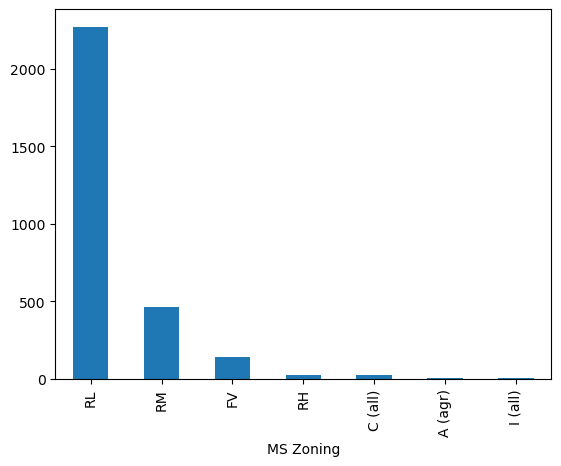

In [265]:
# categoricals
(housing
  ['MS Zoning']
  .value_counts()
  .plot.bar())

<Axes: ylabel='MS Zoning'>

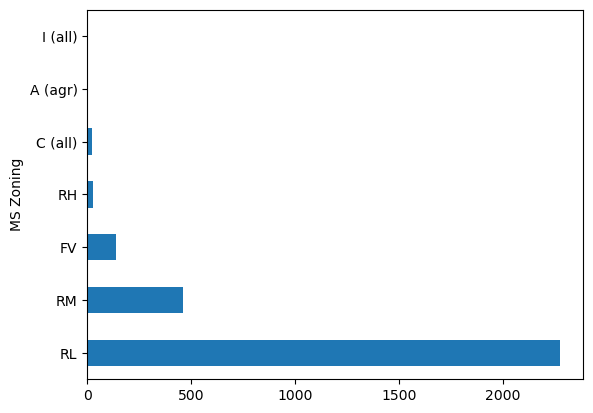

In [266]:
# categoricals
(housing
  ['MS Zoning']
  .value_counts()
  .plot.barh())

NUMERICALS

In [267]:
# Numerical
(housing
 .SalePrice
 .describe()
)

count           2930.0
mean     180796.060068
std       79886.692357
min            12789.0
25%           129500.0
50%           160000.0
75%           213500.0
max           755000.0
Name: SalePrice, dtype: double[pyarrow]

<Axes: >

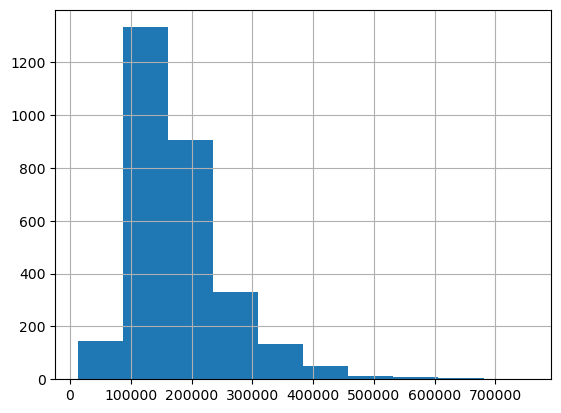

In [268]:
# Numerical
(housing
 .SalePrice
 .hist()
)

<Axes: >

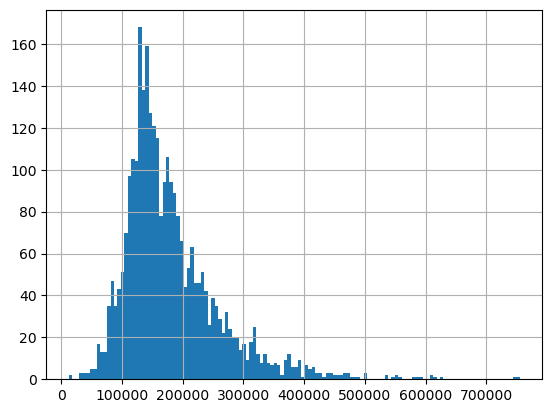

In [269]:
# Numerical
(housing
 .SalePrice
 .hist(bins=130)
)

OUTLIERS & Z score

In [270]:
# Z Score Calculation

# outlier with Z-score (x-mu/sigma)
def calc_z(df, col):
    mean = df[col].mean() 
    std = df[col].std()
    return (df[col]-mean)/std

(housing
 .pipe(calc_z, col='SalePrice')
)

0       0.428156
1      -0.948795
2      -0.110107
3        0.79117
4       0.113961
          ...   
2925    -0.47938
2926   -0.623334
2927   -0.610816
2928   -0.135142
2929    0.090177
Name: SalePrice, Length: 2930, dtype: double[pyarrow]

In [271]:
(housing
 .assign(z_score=calc_z(housing, col='SalePrice'))
)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,z_score
0,1,526301100,20,RL,141,31770,Pave,<NA>,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112,TA,TA,CBlock,TA,Gd,Gd,BLQ,639,Unf,0,441,1080,GasA,Fa,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960,Fin,2,528,TA,TA,P,210,62,0,0,0,0,<NA>,<NA>,<NA>,0,5,2010,WD,Normal,215000,0.428156
1,2,526350040,20,RH,80,11622,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,<NA>,0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,<NA>,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,<NA>,MnPrv,<NA>,0,6,2010,WD,Normal,105000,-0.948795
2,3,526351010,20,RL,81,14267,Pave,<NA>,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,<NA>,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,<NA>,<NA>,Gar2,12500,6,2010,WD,Normal,172000,-0.110107
3,4,526353030,20,RL,93,11160,Pave,<NA>,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,<NA>,0,Gd,TA,CBlock,TA,TA,No,ALQ,1065,Unf,0,1045,2110,GasA,Ex,Y,SBrkr,2110,0,0,2110,1,0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968,Fin,2,522,TA,TA,Y,0,0,0,0,0,0,<NA>,<NA>,<NA>,0,4,2010,WD,Normal,244000,0.79117
4,5,527105010,60,RL,74,13830,Pave,<NA>,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,<NA>,0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,<NA>,MnPrv,<NA>,0,3,2010,WD,Normal,189900,0.113961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37,7937,Pave,<NA>,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,<NA>,0,TA,TA,CBlock,TA,TA,Av,GLQ,819,Unf,0,184,1003,GasA,TA,Y,SBrkr,1003,0,0,1003,1,0,1,0,3,1,TA,6,Typ,0,<NA>,Detchd,1984,Unf,2,588,TA,TA,Y,120,0,0,0,0,0,<NA>,GdPrv,<NA>,0,3,2006,WD,Normal,142500,-0.47938
2926,2927,923276100,20,RL,<NA>,8885,Pave,<NA>,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,<NA>,0,TA,TA,CBlock,Gd,TA,Av,BLQ,301,ALQ,324,239,864,GasA,TA,Y,SBrkr,902,0,0,902,1,0,1,0,2,1,TA,5,Typ,0,<NA>,Attchd,1983,Unf,2,484,TA,TA,Y,164,0,0,0,0,0,<NA>,MnPrv,<NA>,0,6,2006,WD,Normal,131000,-0.623334
2927,2928,923400125,85,RL,62,10441,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,<NA>,0,TA,TA,PConc,Gd,TA,Av,GLQ,337,Unf,0,575,912,GasA,TA,Y,SBrkr,970,0,0,970,0,1,1,0,3,1,TA,6,Typ,0,<NA>,<NA>,<NA>,<NA>,0,0,<NA>,<NA>,Y,80,32,0,0

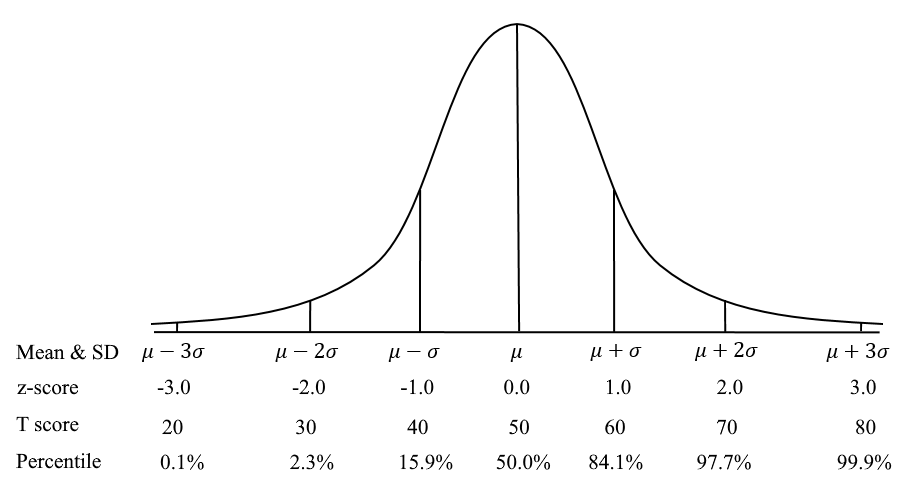

The z-score can be positive or negative. The sign depends on whether the observation is above or below the mean. For instance, the z of  +2  indicates that the raw score (data point) is two standard deviations above the mean, while a  -1  signifies that it is one standard deviation below the mean. The z of 0 equals the mean. Z-scores generally range from  -3  standard deviations (which would fall to the far left of the normal distribution curve) up to  +3  standard deviations (which would fall to the far right of the normal distribution curve). This covers  99%  of the population; there are people outside that range (e.g., gifted students) but for most cases it is difficult to measure the extremes and there is little practical difference.
Reference: https://assess.com/z-score/

In [272]:
#Postive outlier beyond 3 for Z
(housing
 .assign(z_score=calc_z(housing, col='SalePrice'))
 .query('z_score.abs() >= 3')
 #.query('z_score <= -3')
)

/var/folders/nr/0phy1tcx1p336sq0wxy8bs380000gn/T/ipykernel_84917/435166911.py:4: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('z_score.abs() >= 3')


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,z_score
15,16,527216070,60,RL,47,53504,Pave,<NA>,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416,Unf,0,234,1650,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1,0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003,Fin,3,841,TA,TA,Y,503,36,0,0,210,0,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,538000,4.471382
44,45,528150070,20,RL,100,12919,Pave,<NA>,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,<NA>,<NA>,<NA>,0,3,2010,New,Partial,611657,5.393401
46,47,528176010,20,RL,110,14300,Pave,<NA>,Reg,HLS,AllPub,Inside,Mod,NridgHt,Norm,Norm,1Fam,1Story,9,5,2003,2004,Hip,CompShg,VinylSd,VinylSd,BrkFace,1095,Ex,TA,PConc,Ex,TA,Gd,GLQ,1373,Unf,0,1473,2846,GasA,Ex,Y,SBrkr,2696,0,0,2696,1,0,2,1,3,1,Ex,10,Typ,2,Gd,Attchd,2003,Fin,3,958,TA,TA,Y,220,150,0,0,0,0,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,500000,3.995709
366,367,527214050,20,RL,63,17423,Pave,<NA>,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748,Ex,TA,PConc,Ex,TA,No,GLQ,1904,Unf,0,312,2216,GasA,Ex,Y,SBrkr,2234,0,0,2234,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009,Fin,3,1166,TA,TA,Y,0,60,0,0,0,0,<NA>,<NA>,<NA>,0,7,2009,New,Partial,501837,4.018704
421,422,528102140,60,RL,110,14257,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,Norm,1Fam,2Story,9,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,726,Ex,TA,PConc,Ex,TA,No,GLQ,1360,Unf,0,416,1776,GasA,Ex,Y,SBrkr,1794,978,0,2772,1,0,3,1,4,1,Ex,10,Typ,3,Gd,BuiltIn,2007,Fin,3,754,TA,TA,Y,135,64,0,0,0,0,<NA>,<NA>,<NA>,0,6,2009,WD,Normal,462000,3.520035
422,423,528104070,60,RL,104,13518,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,860,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1926,1926,GasA,Ex,Y,SBrkr,1966,1174,0,3140,0,0,3,1,4,1,Ex,11,Typ,2,Gd,BuiltIn,2009,Fin,3,820,TA,TA,Y,144,78,0,0,0,0,<NA>,<NA>,<NA>,0,7,2009,New,Partial,485000,3.807943
423,424,528106020,20,RL,105,15431,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,<NA>,<NA>,<NA>,0,4,2009,WD,Normal,555000,4.684184
431,432,528110010,60,RL,97,13478,Pave,<NA>,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,10,5,2008,2008,Gable,CompShg,CemntBd,CmentBd,Stone,420,Ex,TA,PConc,Ex,TA,Gd,GLQ,1338,Unf,0,384,1722,GasA,Ex,Y,SBrkr,1728,568,0,2296,1,0,2,1,3,1,Ex,10,Typ,1,Gd,BuiltIn,2008,RFn,3,842,TA,TA,Y,382,274,0,0,0,0,<NA>,<NA>,<NA>,0,6,2009,ConLI,Normal,451950,3.394232
432,433,528110020,20,RL,105,13693,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosA,PosA,1Fam,1Story,10,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,472,Ex,TA,PConc,Ex,TA,Gd,GLQ,2288,Unf,0,342,2630,GasA,Ex,Y,SBrkr,2674,0,0,

In [273]:
#Negative outlier less than -3 for Z
(housing
 .assign(z_score=calc_z(housing, col='SalePrice'))
 #.query('z_score.abs() >= 3')
 .query('z_score <= -3')
)

/var/folders/nr/0phy1tcx1p336sq0wxy8bs380000gn/T/ipykernel_84917/1212133149.py:5: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('z_score <= -3')


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,z_score



Advantages of using a z-score
When you standardize the raw data by transforming them into z-scores, you receive the following benefits:

Identify outliers
Understand where an individual score fits into a distribution
Normalize scores for statistical decision-making (e.g., grading on a curve)
Calculate probabilities and percentiles using the standard normal distribution (e.g., percentile rank)
Compare scores on different distributions with different means and standard deviations; a score of 600 on the SAT is equivalent to 24 on the ACT or 115 on an IQ test (nominally).

Calculating IQR
Identify outliers using the IQR (interquartile range) method by assigning a boolean column indicating whether the values are outside the range of median ± 3 * IQR.

In [274]:
def calc_iqr_outlier(df, col):
    ser = df[col]
    iqr = ser.quantile(.75) - ser.quantile(.25)
    med = ser.median()
    small_mask = ser < med-iqr*3
    large_mask = ser > med+iqr*3
    return small_mask | large_mask

housing[
calc_iqr_outlier(housing, 'SalePrice')
]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
15,16,527216070,60,RL,47,53504,Pave,<NA>,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416,Unf,0,234,1650,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1,0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003,Fin,3,841,TA,TA,Y,503,36,0,0,210,0,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,538000
44,45,528150070,20,RL,100,12919,Pave,<NA>,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,<NA>,<NA>,<NA>,0,3,2010,New,Partial,611657
46,47,528176010,20,RL,110,14300,Pave,<NA>,Reg,HLS,AllPub,Inside,Mod,NridgHt,Norm,Norm,1Fam,1Story,9,5,2003,2004,Hip,CompShg,VinylSd,VinylSd,BrkFace,1095,Ex,TA,PConc,Ex,TA,Gd,GLQ,1373,Unf,0,1473,2846,GasA,Ex,Y,SBrkr,2696,0,0,2696,1,0,2,1,3,1,Ex,10,Typ,2,Gd,Attchd,2003,Fin,3,958,TA,TA,Y,220,150,0,0,0,0,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,500000
366,367,527214050,20,RL,63,17423,Pave,<NA>,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748,Ex,TA,PConc,Ex,TA,No,GLQ,1904,Unf,0,312,2216,GasA,Ex,Y,SBrkr,2234,0,0,2234,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009,Fin,3,1166,TA,TA,Y,0,60,0,0,0,0,<NA>,<NA>,<NA>,0,7,2009,New,Partial,501837
421,422,528102140,60,RL,110,14257,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,Norm,1Fam,2Story,9,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,726,Ex,TA,PConc,Ex,TA,No,GLQ,1360,Unf,0,416,1776,GasA,Ex,Y,SBrkr,1794,978,0,2772,1,0,3,1,4,1,Ex,10,Typ,3,Gd,BuiltIn,2007,Fin,3,754,TA,TA,Y,135,64,0,0,0,0,<NA>,<NA>,<NA>,0,6,2009,WD,Normal,462000
422,423,528104070,60,RL,104,13518,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,860,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1926,1926,GasA,Ex,Y,SBrkr,1966,1174,0,3140,0,0,3,1,4,1,Ex,11,Typ,2,Gd,BuiltIn,2009,Fin,3,820,TA,TA,Y,144,78,0,0,0,0,<NA>,<NA>,<NA>,0,7,2009,New,Partial,485000
423,424,528106020,20,RL,105,15431,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,<NA>,<NA>,<NA>,0,4,2009,WD,Normal,555000
431,432,528110010,60,RL,97,13478,Pave,<NA>,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,10,5,2008,2008,Gable,CompShg,CemntBd,CmentBd,Stone,420,Ex,TA,PConc,Ex,TA,Gd,GLQ,1338,Unf,0,384,1722,GasA,Ex,Y,SBrkr,1728,568,0,2296,1,0,2,1,3,1,Ex,10,Typ,1,Gd,BuiltIn,2008,RFn,3,842,TA,TA,Y,382,274,0,0,0,0,<NA>,<NA>,<NA>,0,6,2009,ConLI,Normal,451950
432,433,528110020,20,RL,105,13693,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosA,PosA,1Fam,1Story,10,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,472,Ex,TA,PConc,Ex,TA,Gd,GLQ,2288,Unf,0,342,2630,GasA,Ex,Y,SBrkr,2674,0,0,2674,2,0,2,1,2,1,Ex,8,Typ,2,Gd,Attchd,2007,Fin,3,762,TA,TA,Y,360,50,0,0,0,0,<NA>

In [275]:
def calc_iqr_outlier(df, col):
    ser = df[col]
    iqr = ser.quantile(.75) - ser.quantile(.25)
    med = ser.median()
    small_mask = ser < med-iqr*3
    large_mask = ser > med+iqr*3
    return small_mask | large_mask

(housing
 .assign(iqr_outlier=calc_iqr_outlier(housing, col='SalePrice'))
 .query('iqr_outlier')
)

/var/folders/nr/0phy1tcx1p336sq0wxy8bs380000gn/T/ipykernel_84917/288701225.py:11: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('iqr_outlier')


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,iqr_outlier
15,16,527216070,60,RL,47,53504,Pave,<NA>,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416,Unf,0,234,1650,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1,0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003,Fin,3,841,TA,TA,Y,503,36,0,0,210,0,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,538000,True
44,45,528150070,20,RL,100,12919,Pave,<NA>,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,2364,0,0,2364,1,0,2,1,2,1,Ex,11,Typ,2,Gd,Attchd,2009,Fin,3,820,TA,TA,Y,0,67,0,0,0,0,<NA>,<NA>,<NA>,0,3,2010,New,Partial,611657,True
46,47,528176010,20,RL,110,14300,Pave,<NA>,Reg,HLS,AllPub,Inside,Mod,NridgHt,Norm,Norm,1Fam,1Story,9,5,2003,2004,Hip,CompShg,VinylSd,VinylSd,BrkFace,1095,Ex,TA,PConc,Ex,TA,Gd,GLQ,1373,Unf,0,1473,2846,GasA,Ex,Y,SBrkr,2696,0,0,2696,1,0,2,1,3,1,Ex,10,Typ,2,Gd,Attchd,2003,Fin,3,958,TA,TA,Y,220,150,0,0,0,0,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,500000,True
366,367,527214050,20,RL,63,17423,Pave,<NA>,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748,Ex,TA,PConc,Ex,TA,No,GLQ,1904,Unf,0,312,2216,GasA,Ex,Y,SBrkr,2234,0,0,2234,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009,Fin,3,1166,TA,TA,Y,0,60,0,0,0,0,<NA>,<NA>,<NA>,0,7,2009,New,Partial,501837,True
421,422,528102140,60,RL,110,14257,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,Norm,1Fam,2Story,9,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,726,Ex,TA,PConc,Ex,TA,No,GLQ,1360,Unf,0,416,1776,GasA,Ex,Y,SBrkr,1794,978,0,2772,1,0,3,1,4,1,Ex,10,Typ,3,Gd,BuiltIn,2007,Fin,3,754,TA,TA,Y,135,64,0,0,0,0,<NA>,<NA>,<NA>,0,6,2009,WD,Normal,462000,True
422,423,528104070,60,RL,104,13518,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,860,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1926,1926,GasA,Ex,Y,SBrkr,1966,1174,0,3140,0,0,3,1,4,1,Ex,11,Typ,2,Gd,BuiltIn,2009,Fin,3,820,TA,TA,Y,144,78,0,0,0,0,<NA>,<NA>,<NA>,0,7,2009,New,Partial,485000,True
423,424,528106020,20,RL,105,15431,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,<NA>,<NA>,<NA>,0,4,2009,WD,Normal,555000,True
431,432,528110010,60,RL,97,13478,Pave,<NA>,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,10,5,2008,2008,Gable,CompShg,CemntBd,CmentBd,Stone,420,Ex,TA,PConc,Ex,TA,Gd,GLQ,1338,Unf,0,384,1722,GasA,Ex,Y,SBrkr,1728,568,0,2296,1,0,2,1,3,1,Ex,10,Typ,1,Gd,BuiltIn,2008,RFn,3,842,TA,TA,Y,382,274,0,0,0,0,<NA>,<NA>,<NA>,0,6,2009,ConLI,Normal,451950,True
432,433,528110020,20,RL,105,13693,Pave,<NA>,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosA,PosA,1Fam,1Story,10,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,472,Ex,TA,PConc,Ex,TA,Gd,GLQ,2288,Unf,0,342,2630,GasA,Ex,Y,SBrkr,2674,0,0,2674,2,0,2,1,2,1,Ex,8,Typ,2,

CORRELATION

1. Calculate the Pearson correlation

In [276]:
# Pearson correlation
housing.corr()

ValueError: could not convert string to float: 'RL'

In [277]:
# since it cannot find correlation for categorical features, we use numeric_only=True
housing.corr(numeric_only=True)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,-0.032321,-0.002773,0.005780,-0.028719,-0.013201,-0.000417,0.013589,-0.009342,-0.042539,0.024978,-0.044985,-0.039749,0.015424,-0.017685,0.002612,-0.019156,-0.054580,-0.036185,-0.035435,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,-0.098375,-0.001145,-0.087707,-0.189642,-0.141902,-0.003289,0.056940,-0.107579,-0.037759,0.004328,-0.171431,-0.166636,0.006345,0.076470,-0.068981,-0.108056,-0.263692,-0.237484,-0.210606,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,-0.070946,-0.130421,-0.219445,-0.247828,0.304237,0.025765,0.068061,0.013701,-0.003329,0.134631,0.175879,-0.019208,0.257698,0.031898,-0.049955,0.092526,-0.045883,-0.103239,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,0.045999,0.116743,0.353773,0.457391,0.029187,0.005249,0.383822,0.108915,-0.024724,0.184521,0.041880,0.240442,0.005407,0.353137,0.257255,0.077801,0.308706,0.358505,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,0.083150,0.023658,0.253589,0.332235,0.032996,0.000812,0.285599,0.125877,0.026903,0.127433,0.035497,0.136569,-0.020301,0.216597,0.256989,-0.008383,0.179512,0.212822,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,-0.041287,0.270058,0.547294,0.477837,0.241402,-0.048680,0.570556,0.167858,-0.041647,0.522263,0.268853,0.063291,-0.159744,0.380693,0.393007,0.575140,0.599545,0.563503,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,0.041134,-0.136819,-0.173344,-0.157052,0.006218,0.009175,-0.115643,-0.042766,0.084455,-0.214316,-0.088127,-0.006137,-0.086386,-0.089816,-0.031702,-0.329247,-0.181557,-0.153754,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,-0.027415,0.128998,0.407526,0.310463,0.016828,-0.144282,0.241726,0.211849,-0.030626,0.469406,0.269268,-0.055093,-0.137852,0.111919,0.170672,0.843814,0.537443,0.480131,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,-0.062129,0.164805,0.297481,0.242108,0.158939,-0.060365,0.316855,0.134387,-0.046292,0.457266,0.211771,-0.021536,-0.142404,0.197528,0.133322,0.658758,0.425403,0.376438,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,-0.016019,0.091668,0

2. Calculate the Spearman correlation

In [278]:
(housing
 .corr(method='spearman', numeric_only=True)
 .style
 .background_gradient()
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056214,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274244,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084326,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073599,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638165,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

In [279]:
(housing
 .corr(method='spearman', numeric_only=True)
 .style
 .background_gradient(cmap='RdBu')
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056214,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274244,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084326,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073599,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638165,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

In [280]:
(housing
 .corr(method='spearman', numeric_only=True)
 .style
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.205863,0.015074,-0.024209,0.012684,-0.049175,-0.015534,-0.056978,-0.084144,-0.041604,-0.034229,-0.018105,0.007011,-0.023661,-0.007155,-0.003142,0.026532,-0.023809,-0.041665,0.019375,-0.048754,-0.036492,0.014230,-0.015031,0.001629,-0.022008,-0.056214,-0.037003,-0.034251,-0.025811,0.000760,0.025225,-0.015117,0.006032,0.047986,-0.038106,0.142150,-0.977264,-0.035703
PID,0.205863,1.000000,-0.026875,-0.096820,-0.040342,-0.314353,0.111922,-0.314979,-0.208414,-0.237169,-0.050349,0.012860,-0.131413,-0.188111,-0.130427,-0.069092,0.047204,-0.165111,-0.009074,0.035377,-0.235566,-0.186542,-0.014036,0.084954,-0.130301,-0.151539,-0.274244,-0.276663,-0.207054,-0.092368,-0.176972,0.152769,0.005809,0.006353,0.003222,0.018754,-0.051290,0.003198,-0.270660
MS SubClass,0.015074,-0.026875,1.000000,-0.363408,-0.320550,0.103475,-0.065550,0.035632,0.015590,-0.009247,-0.098222,-0.093004,-0.113501,-0.300856,-0.278139,0.478281,0.059254,0.186612,-0.040172,0.004709,0.198671,0.266447,0.056779,0.269444,0.137183,0.010696,0.084326,0.020071,-0.047607,0.019062,0.030639,-0.005318,-0.033196,-0.039486,-0.001964,-0.031959,0.014999,-0.021873,0.001973
Lot Frontage,-0.024209,-0.096820,-0.363408,1.000000,0.659412,0.223162,-0.104785,0.192888,0.134932,0.275334,0.156582,0.044513,0.092700,0.375535,0.442289,0.000692,-0.042646,0.361933,0.103704,-0.029865,0.209843,0.077310,0.288409,0.010360,0.362169,0.248728,0.126930,0.348630,0.375849,0.118401,0.173802,-0.092787,0.010447,0.086195,0.083211,0.037856,0.013041,0.003559,0.397980
Lot Area,0.012684,-0.040342,-0.320550,0.659412,1.000000,0.196855,-0.079006,0.121151,0.103266,0.205822,0.171376,0.057461,0.068211,0.352739,0.439129,0.064565,-0.016875,0.418321,0.106726,0.009234,0.224679,0.128025,0.298550,-0.025662,0.383795,0.311907,0.073599,0.344115,0.370980,0.177609,0.171777,-0.042467,0.029028,0.091527,0.083071,0.073861,0.004774,-0.021720,0.429249
Overall Qual,-0.049175,-0.314353,0.103475,0.223162,0.196855,1.000000,-0.189638,0.664590,0.579323,0.423202,0.179239,-0.091898,0.239273,0.472852,0.415988,0.237677,-0.050242,0.577780,0.148886,-0.047082,0.556720,0.294043,0.077886,-0.170318,0.378023,0.419263,0.638165,0.611424,0.547140,0.290231,0.440433,-0.192093,0.019398,0.026212,0.033057,-0.076443,0.029163,-0.017015,0.808800
Overall Cond,-0.015534,0.111922,-0.065550,-0.104785,-0.079006,-0.189638,1.000000,-0.422306,-0.075119,-0.181996,-0.020644,0.095954,-0.123413,-0.223382,-0.187027,-0.012957,0.018427,-0.189100,-0.045087,0.089080,-0.282743,-0.106949,-0.012151,-0.084478,-0.126437,-0.056648,-0.395204,-0.258175,-0.216048,-0.036363,-0.175446,0.134745,0.044303,0.050333,-0.020386,0.061434,-0.006480,0.039612,-0.165657
Year Built,-0.056978,-0.314979,0.035632,0.192888,0.121151,0.664590,-0.422306,1.000000,0.707678,0.398747,0.214515,-0.095639,0.124441,0.442113,0.324522,0.022695,-0.123324,0.317367,0.187555,-0.054695,0.536116,0.265468,-0.032275,-0.129373,0.181709,0.199048,0.900386,0.600675,0.533612,0.296569,0.402890,-0.434250,0.011180,-0.066507,0.004203,-0.079103,0.016111,-0.009527,0.680822
Year Remod/Add,-0.084144,-0.208414,0.015590,0.134932,0.103266,0.579323,-0.075119,0.707678,1.000000,0.249285,0.087763,-0.116761,0.167045,0.309842,0.250180,0.090110,-0.058727,0.318917,0.120280,-0.057018,0.455856,0.179883,-0.032359,-0.144737,0.207894,0.148938,0.742208,0.460615,0.409481,0.249966,0.372293,-0.268871,0.049288,-0.058677,-0.011139,-0.057701,0.014296,0.041084,0.601454
Mas Vnr Area,-0.041604,-0.237169,-0.009247,0.275334,0.205822,0.423202,-0.181996,0.398747,0.249285,1.000000,0.270651,-0.028671,0.055245,

Linear vs. Monotonic:
Pearson: Linear.   
Spearman: Monotonic.

Data Assumptions:
Pearson: Requires normally distributed continuous data.   
Spearman: More flexible, can handle non-normal and ordinal data.  

Outlier Sensitivity:
Pearson: Sensitive to outliers.   
Spearman: Robust to outliers.  

When to Use Which:

Use Pearson:
When you want to measure the strength of a linear relationship.
When your data is continuous and normally distributed.

Use Spearman:
When you want to measure the strength of a monotonic relationship.
When your data is ordinal or non-normally distributed.
When your data contains outliers.